In [152]:
from os import listdir, path, errno, makedirs
from shutil import copyfile
import re
from PIL import Image, ImageStat
import numpy as np
import pandas as pd
from scipy import stats
import scipy.fftpack
import matplotlib.pyplot as plt
import cv2 as cv
import scipy.misc
from scipy import signal
%matplotlib inline

In [153]:
def normalize(img, M0=100, VAR0=100):
    I = img.copy()
    M = I.sum() / I.shape[0] / I.shape[1]
    VAR = ((I - M) ** 2).sum() / I.shape[0] / I.shape[1]
    G = -np.sqrt(VAR0 * (I - M) ** 2 / VAR)
    G[I > M] *= -1
    G += M0
    return G

In [154]:
def clrnormalize(img):
    res=img.copy()
    for i in range(res.shape[0]):
        for j in range(res.shape[1]):
            if((res[i][j][0]+res[i][j][1]+res[i][j][2])!=0):
                temp1=res[i][j][0]*255/(res[i][j][0]+res[i][j][1]+res[i][j][2])
                temp2=res[i][j][1]*255/(res[i][j][0]+res[i][j][1]+res[i][j][2])
                temp3=res[i][j][2]*255/(res[i][j][0]+res[i][j][1]+res[i][j][2])
                res[i][j][0]=temp1
                res[i][j][1]=temp2
                res[i][j][2]=temp3
    return res

In [155]:
def build_filters():
    filters = []
    ksize = 31
    for theta in np.arange(0, np.pi, np.pi/32):
        kern = cv.getGaborKernel((ksize, ksize), 5, theta, 10.0,1, 0, ktype=cv.CV_32F)
        kern /= 1.5*kern.sum()
        filters.append(kern)
    return filters

In [156]:
def process(img, filters):
    accum = np.zeros_like(img)
    for kern in filters:
        fimg = cv.filter2D(img, cv.CV_8UC3, kern)
        np.maximum(accum, fimg, accum)
    return accum

In [157]:
def func(img, n_scale,isFiltered):
    res= img.copy()
    if(isFiltered):
        res = normalize(img)
    res2 = res.reshape(-1)
    N = res2.shape[0] / n_scale
    T = 1.0 / (255 * 2)
    yf = scipy.fftpack.fft(res2)
    xf = np.linspace(0.0, 1.0 / (2.0 * T), int(N / 2))
    
    return xf[10:], (2.0 / N * np.abs(yf[:int(N / 2)]))[10:], res

In [158]:
def clrfunc(img, n_scale,isFiltered):
    res= img.copy()
    if(isFiltered):
        res = clrnormalize(img)
    res2 = res.reshape(-1)
    N = res2.shape[0] / n_scale
    T = 1.0 / (255 * 2)
    yf = scipy.fftpack.fft(res2)
    xf = np.linspace(0.0, 1.0 / (2.0 * T), int(N / 2))
    
    return xf[10:], (2.0 / N * np.abs(yf[:int(N / 2)]))[10:], res

In [159]:
def toclrmap(img,n_scale):
    res= img.copy()
    print(str(res.shape[0])+'x'+str(res.shape[1])+' : ' +str(res.shape[0]*res.shape[1])+" pixel" )
    btmap=np.zeros(res.shape[0]*res.shape[1])
    count=int(0)
    for i in range(res.shape[0]):
        for j in range(res.shape[1]):
            btmap[count]=int(res[i][j][0]//1+1000*(res[i][j][1]//1)+1000000*(res[i][j][2]//1))
            count+=1
    N = btmap.shape[0] // n_scale
    T = 1.0 / (255255255)
    yf = scipy.fftpack.fft(btmap)
    xf = np.linspace(0.0, 1.0 /T, N)
    return xf, ( 1/ N * np.abs(yf[:int(N)])), btmap

In [160]:
def histogram(img):
    table=np.zeros(300)
    for e in img:
        for i in e:
            table[int(i)]+=1
    return table

In [161]:
def build_filters():
    filters = []
    ksize = 31
    for theta in np.arange(0, np.pi, np.pi/32):
        kern = cv.getGaborKernel((ksize, ksize), 5, theta, 10.0,1, 0, ktype=cv.CV_32F)
        kern /= 1.5*kern.sum()
        filters.append(kern)
    return filters

def process(img, filters):
    accum = np.zeros_like(img)
    for kern in filters:
        fimg = cv.filter2D(img, cv.CV_8UC3, kern)
        np.maximum(accum, fimg, accum)
    return accum

In [281]:
def quick_test(p):
    fig, axes = plt.subplots(1, 4,  figsize=(20, 5),sharey=False)
#     img = cv.imread(p, 0)
#     clr = cv.imread(p)
#     x, y, res = func(img, n_scale)
#     t = clr.reshape((clr.shape[0]*clr.shape[1], 3))
    img = cv.imread(p, 0)
    clr = cv.imread(p)
    clr=cv.cvtColor(clr,cv.COLOR_BGR2RGB)
    t = clr.reshape((clr.shape[0]*clr.shape[1], 3))
    #print(t.std(axis=0), t.mean(axis=0))
    #print(t[:, [0, 1 , 2]].mean())
    #print(t[:, [0, 1 , 2]].std(axis=0))
#     print(t[:, [0, 2]].std(axis=0),t[:, [0, 2]].std(axis=0).sum())
#     print(t[:, [1, 2]].std(axis=0),t[:, [1, 2]].std(axis=0).sum())
#     print(t[:, [0, 1]].std(axis=0),t[:, [0, 1]].std(axis=0).sum())
      
#     meanbal=img.mean()
#     print(balancer)
    fix=img.shape[0]*img.shape[1]
#     x, y, res = clrfunc(clr, 1,False)
#     axes[0,0].plot(x,y/fix)
#     x, y, res = clrfunc(clr, 1,True)
#     axes[0,1].plot(x,y/fix)
   # x, y, res = func(img, 1,False)
   # axes[1,0].plot(x,y/fix)
   # x, y, res = func(img, 1,True)
    #axes[1,1].plot(x,y/fix)
    #x,y,res = toclrmap(clr, 100)
    #axes[0,2].set_yscale("log", nonposx='clip')
    his=histogram(img)
    normhis=histogram(normalize(img))
    #brightHSV = cv.cvtColor(clr, cv.COLOR_BGR2HSV)
    axes[0].plot(np.arange(300),his/fix)
    axes[0].plot(np.arange(300),normhis/fix)
    axes[0].plot(np.arange(300),normhis/fix)
    axes[1].plot(np.arange(300),histogram(saturation(clr)*255)/fix)
    axes[1].plot(np.arange(300),histogram(intensity(clr)*saturation(clr))/fix)
    axes[1].plot(np.arange(300),histogram(intensity(clr))/fix)
    #axes[1].plot(np.arange(300),histogram(brightHSV[:][:][0])/fix)
    #axes[1].plot(np.arange(300),histogram(brightHSV[:][:][1])/fix)
    #axes[1].plot(np.arange(300),histogram(brightHSV[:][:][2])/fix)
    #axes[1].plot(np.arange(300),colorbr/fix)
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv.calcHist([clr],[i],None,[256],[0,256])/fix
        axes[2].plot(histr,color = col)
    axes[3].imshow(clr)
    plt.show()

In [217]:
def saturation(img):
    I=np.zeros((img.shape[0],img.shape[1]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            I[i][j]=1-3*(np.min(img[i][j]))/np.sum(img[i][j])
            if(np.sum(img[i][j])==0):
                I[i][j]=0
    return I

In [218]:
def intensity(img):
    I=np.zeros((img.shape[0],img.shape[1]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            I[i][j]=np.sum(img[i][j])/3
    return I

In [242]:
def showIm(p):
    fig, axes = plt.subplots(1, 2,  figsize=(20, 20),sharey=False)
    img = cv.imread(p, 0)
    clr = cv.imread(p)
    clr=cv.cvtColor(clr,cv.COLOR_BGR2RGB)
    equ = cv.equalizeHist(img)
    #axes[0,0].imshow(clr)
    axes[0].imshow(img,cmap='gray')
    axes[1].imshow(equ,cmap='gray')
    #axes[1,1].imshow(clrnormalize(clr))
    #axes[1,0].imshow(normalize(img),cmap='gray')
    plt.show()


# Era

# Prehistoric Painting

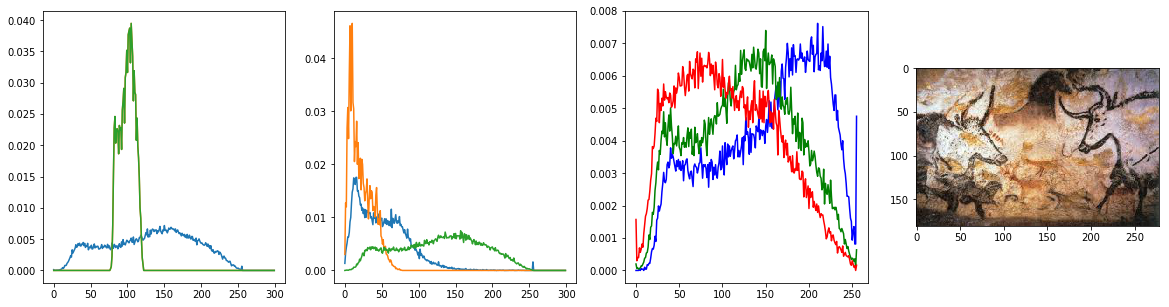

d:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


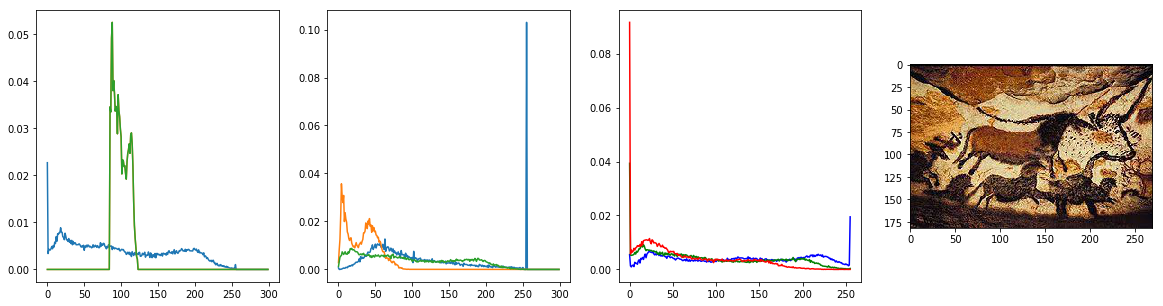

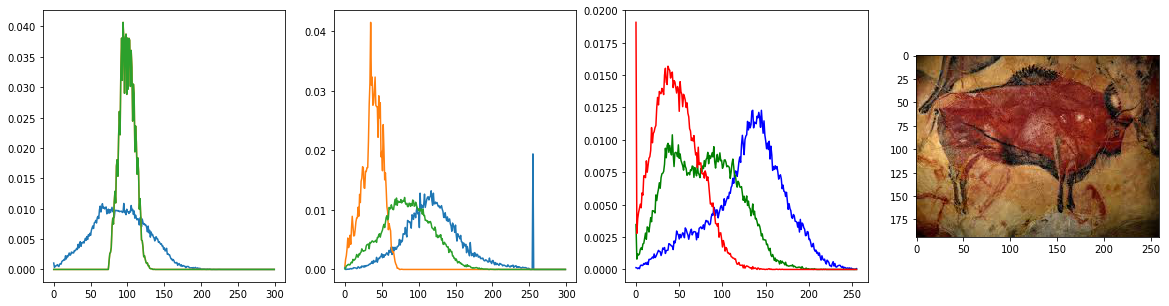

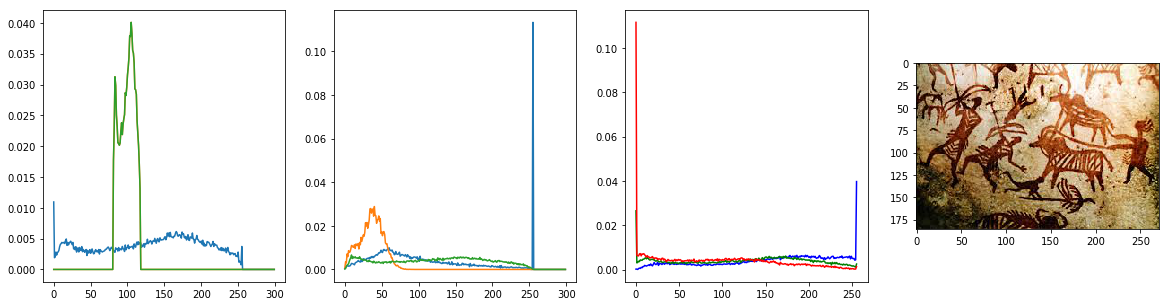

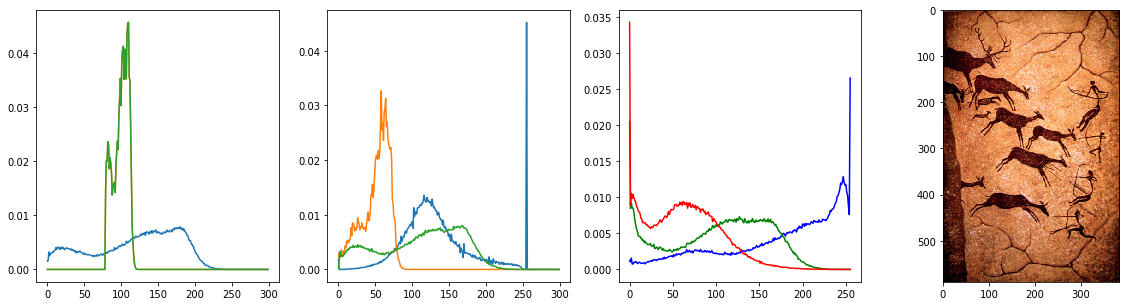

In [ ]:
for i in range(1,21):
    path= '/CP/Git_time/TimeSeries_mid/pre/pre'+str(i//10)+str(i%10)+'.jpg'
    quick_test(path)

# Ancient Ages Painting

d:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


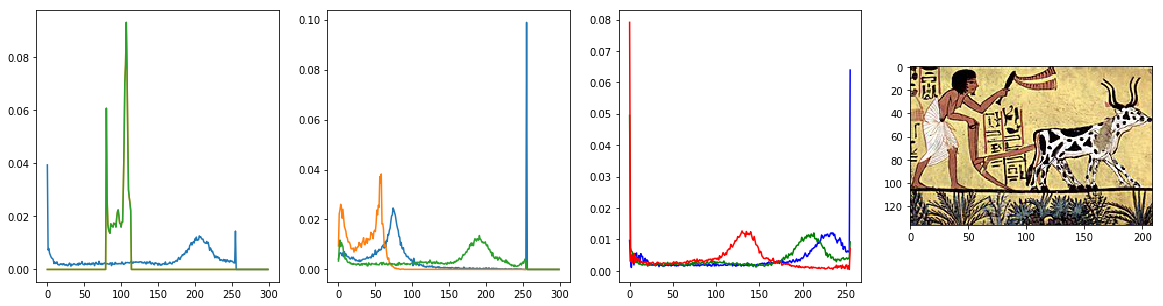

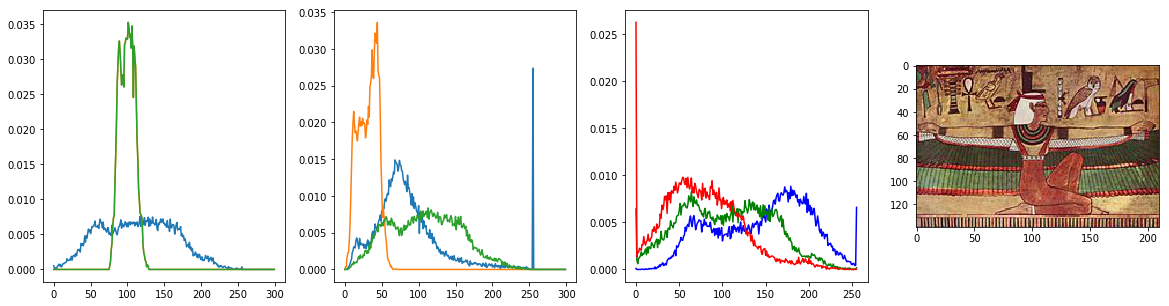

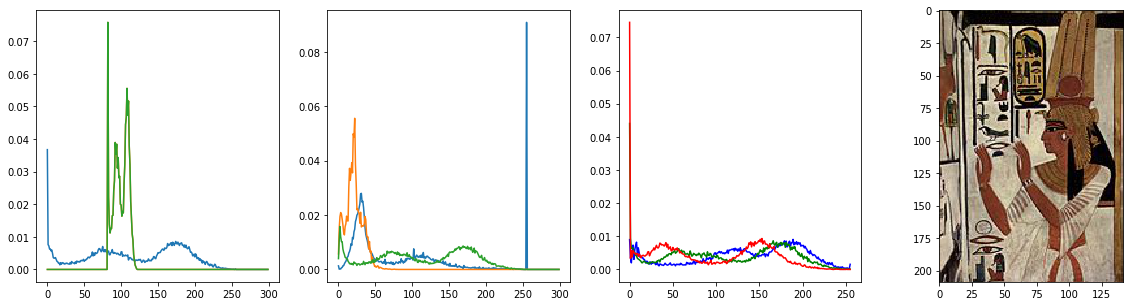

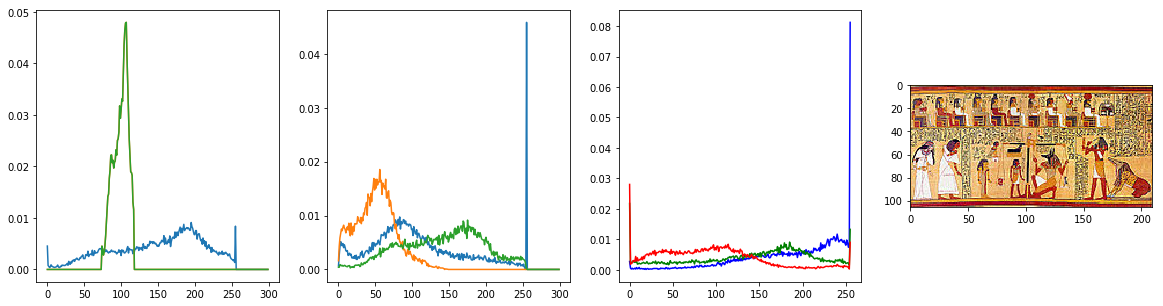

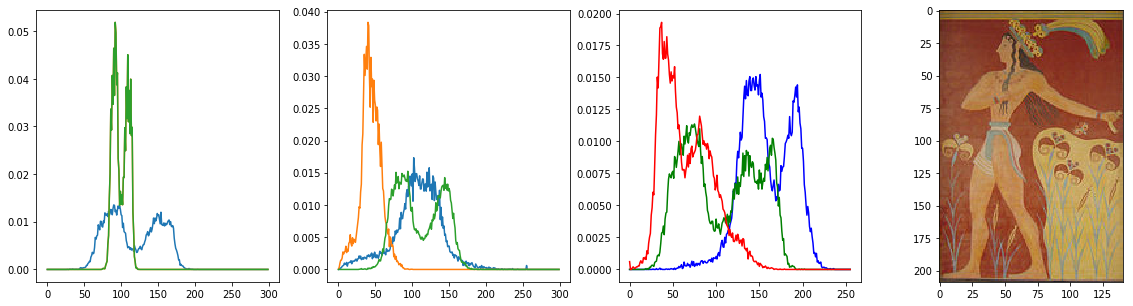

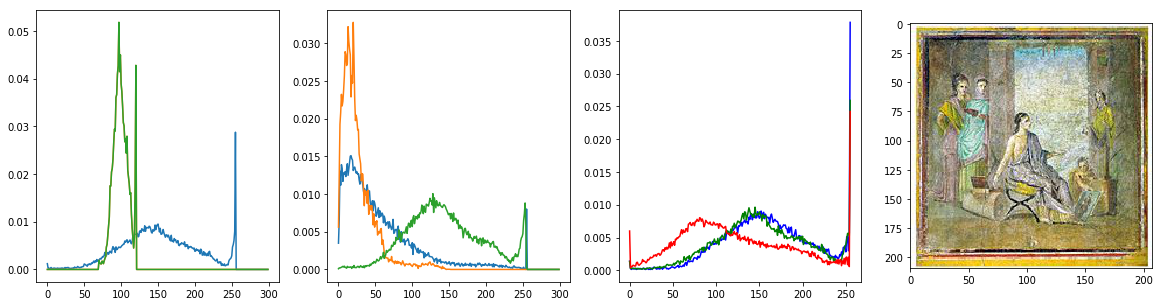

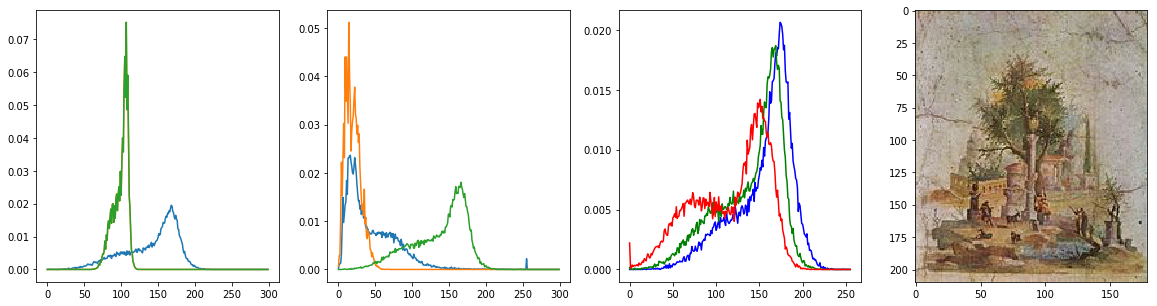

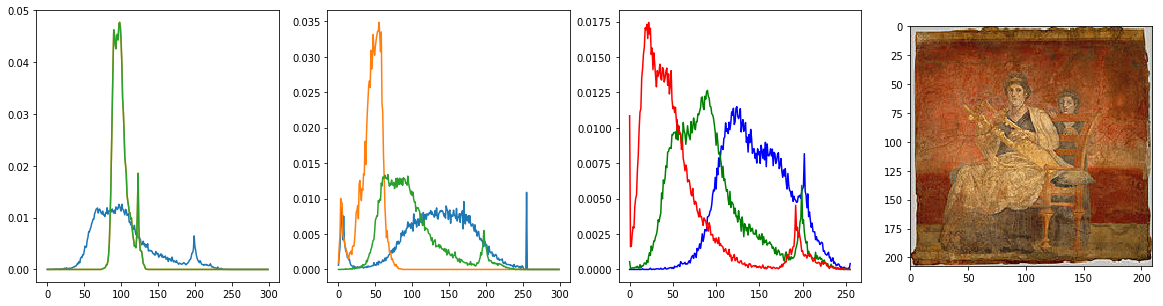

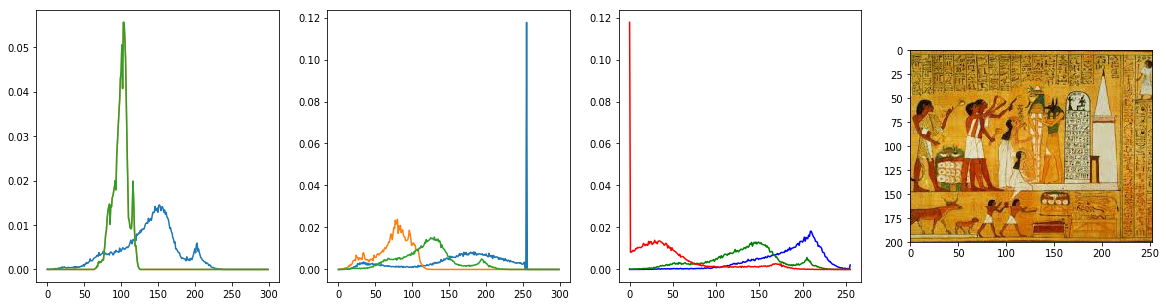

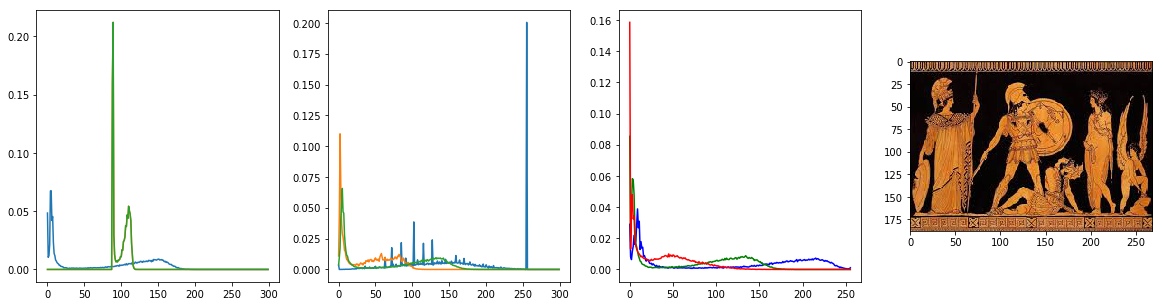

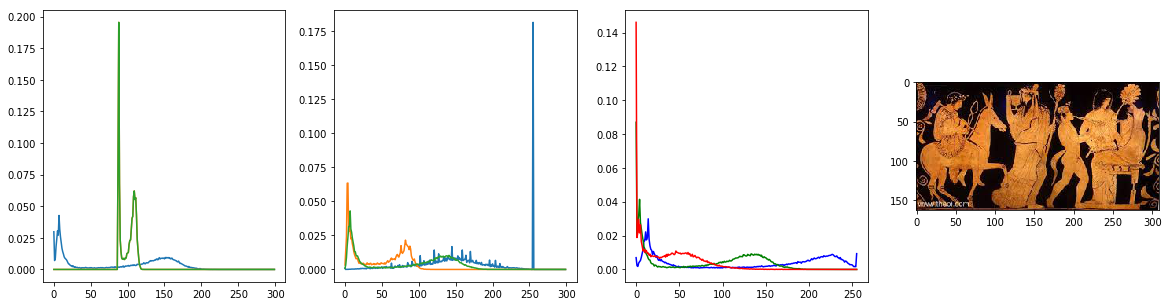

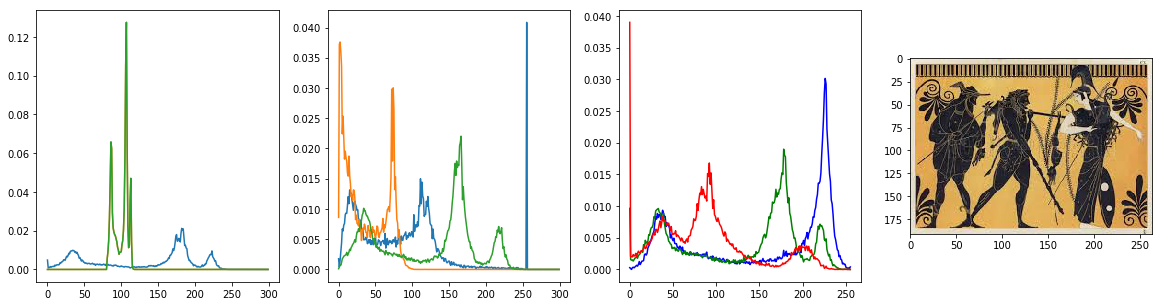

In [269]:
for i in range(1,13):
    path= '/CP/Git_time/TimeSeries_mid/an/an'+str(i//10)+str(i%10)+'.jpg'
    quick_test(path)

# Middle Ages Painting

In [ ]:
for i in range(1,16):
    path= '/CP/Git_time/TimeSeries_mid/middle/mid'+str(i//10)+str(i%10)+'.jpg'
    quick_test(path)

# Modern Era Painting

# Impressionism

In [ ]:
Datanum=10

d:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


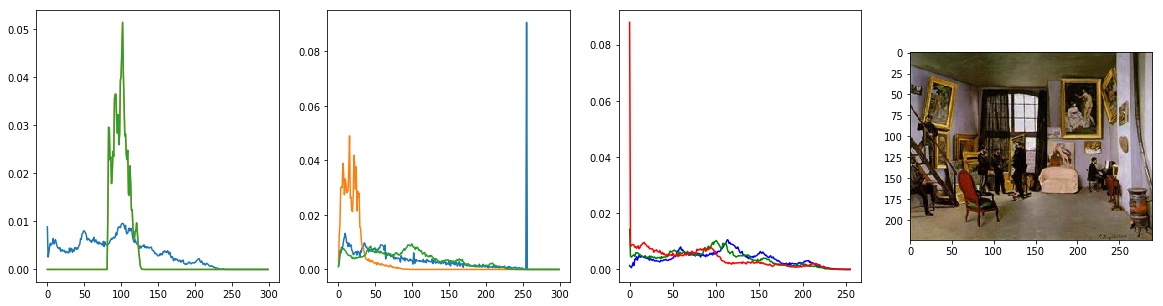

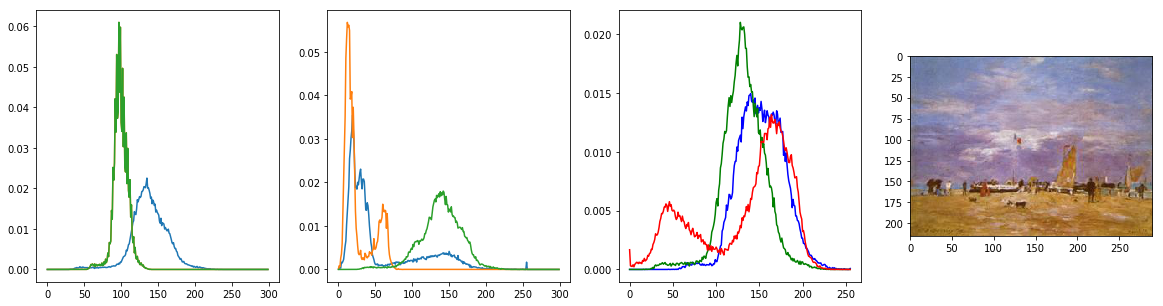

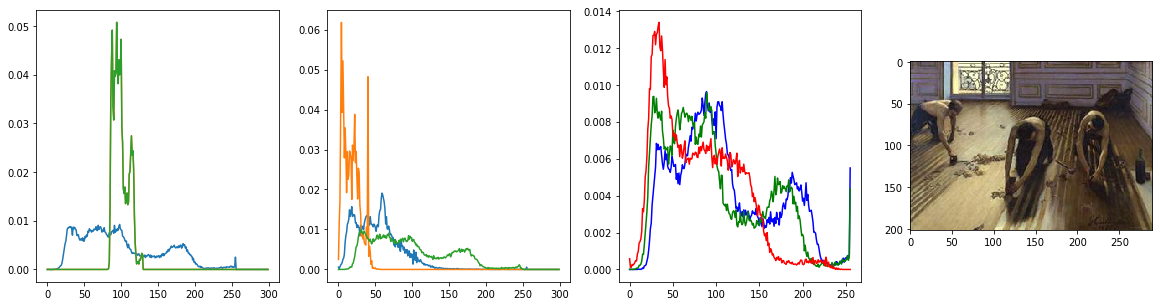

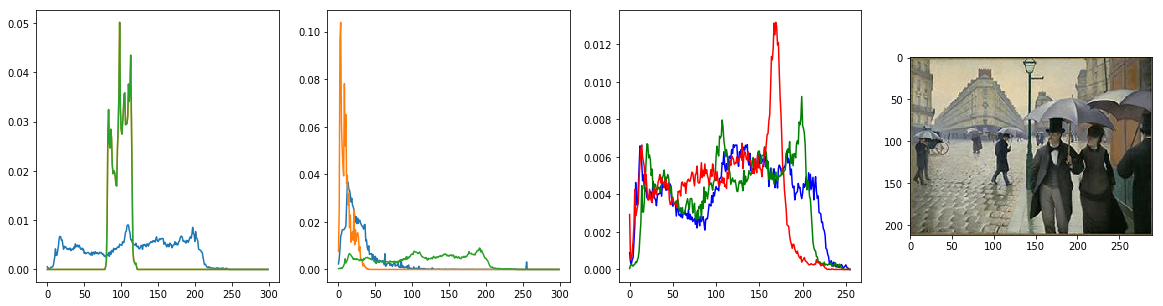

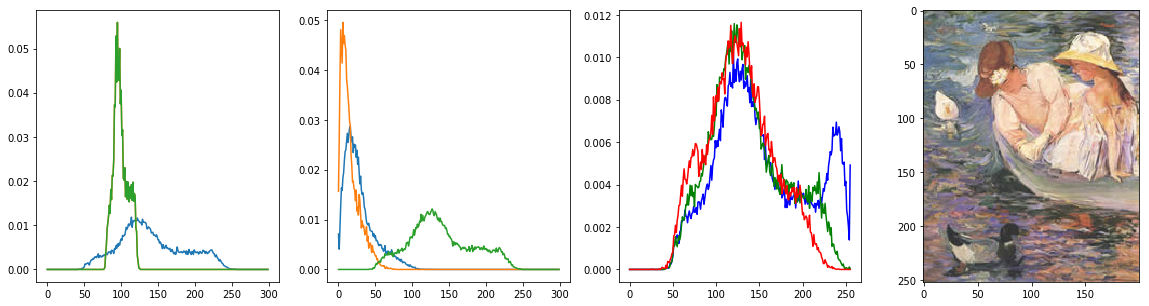

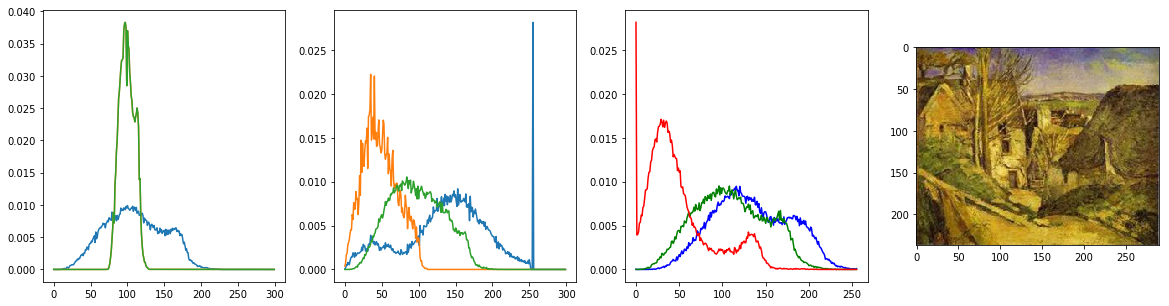

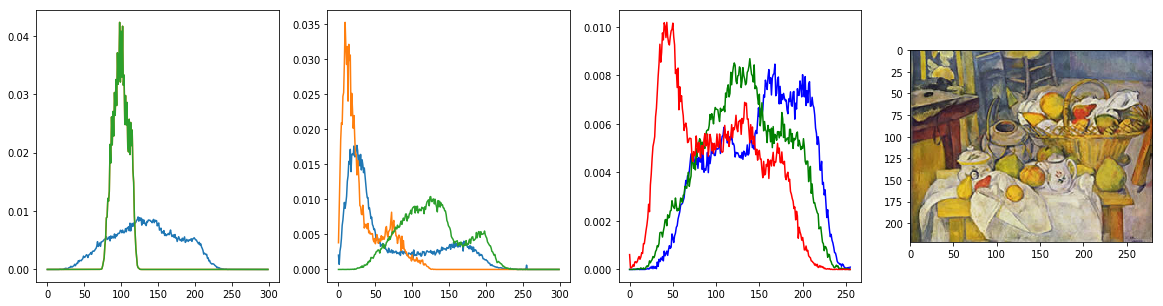

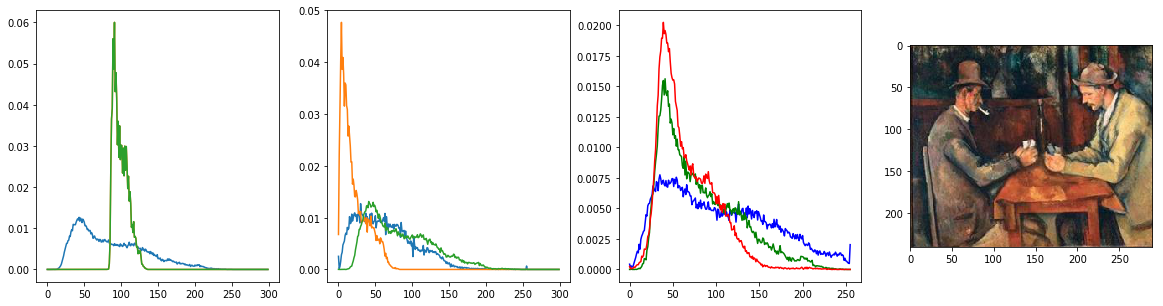

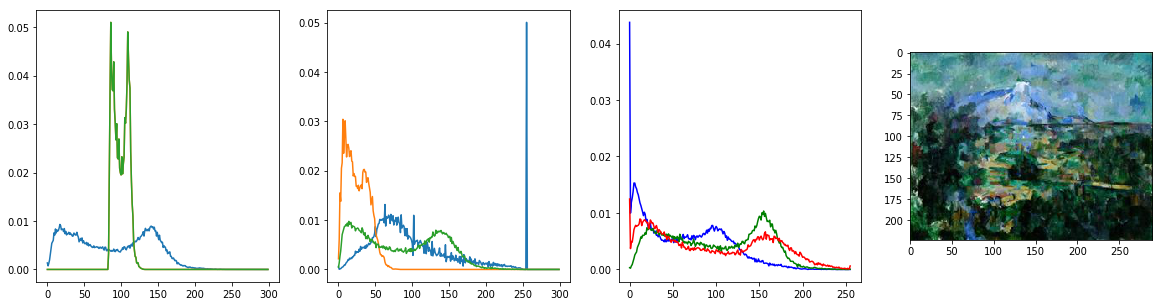

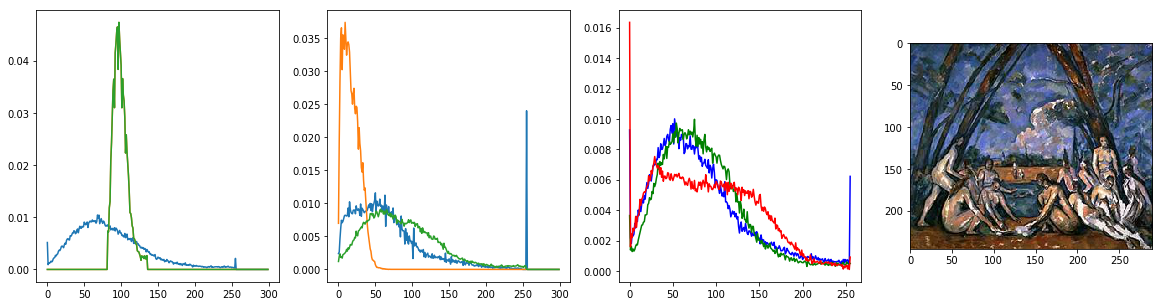

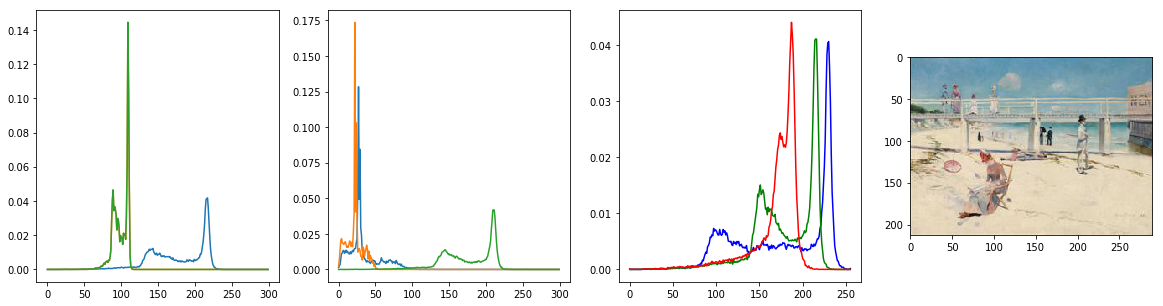

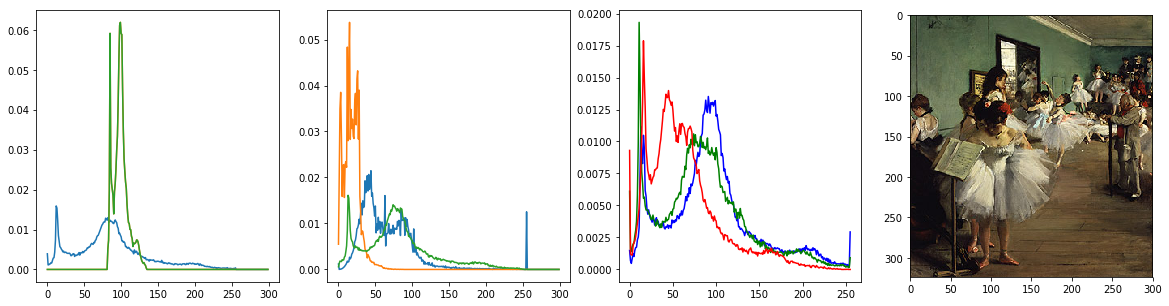

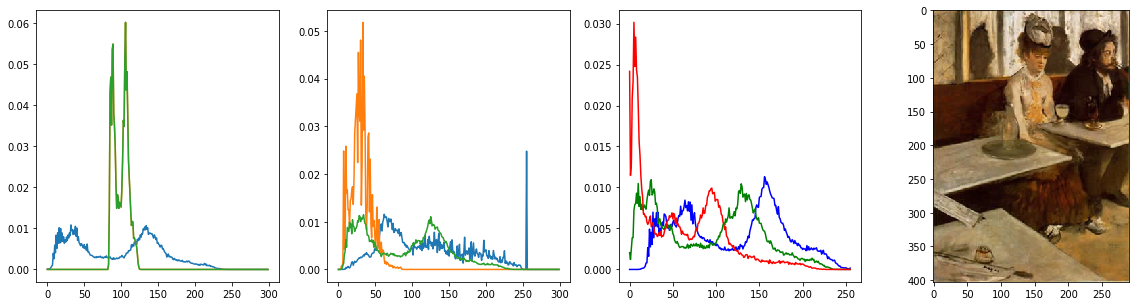

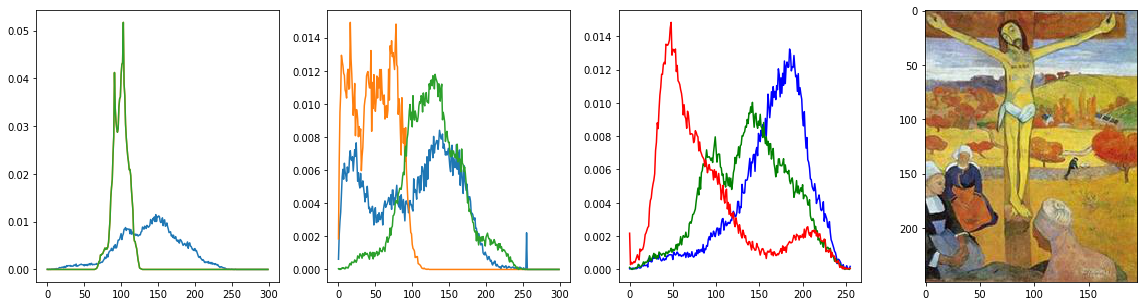

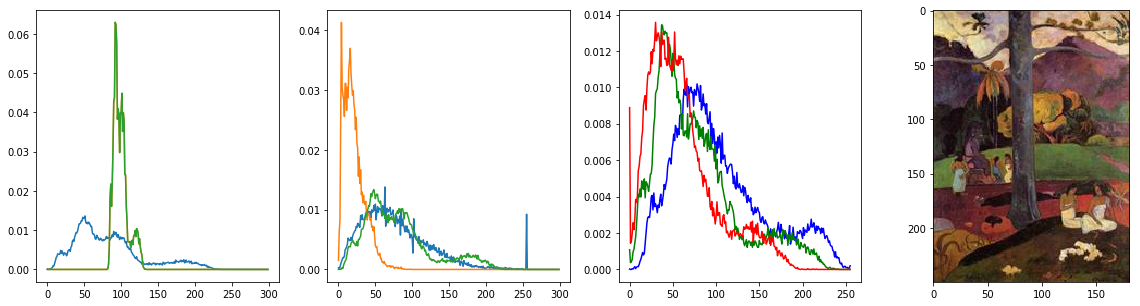

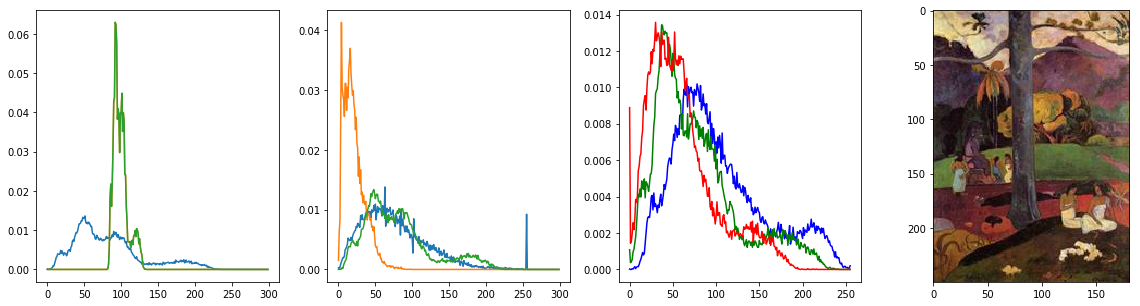

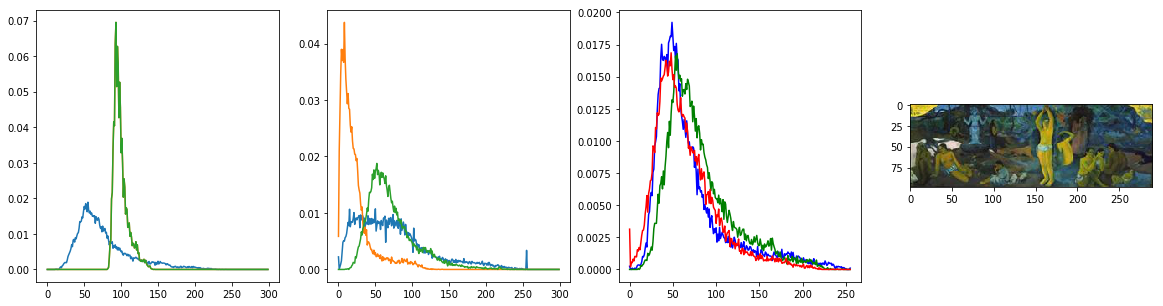

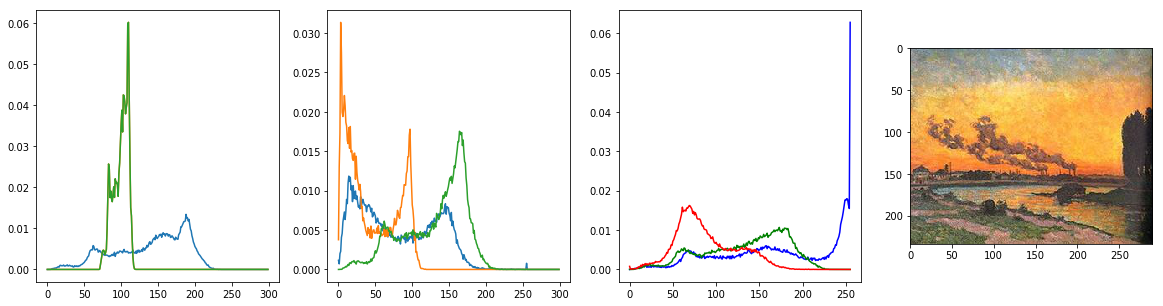

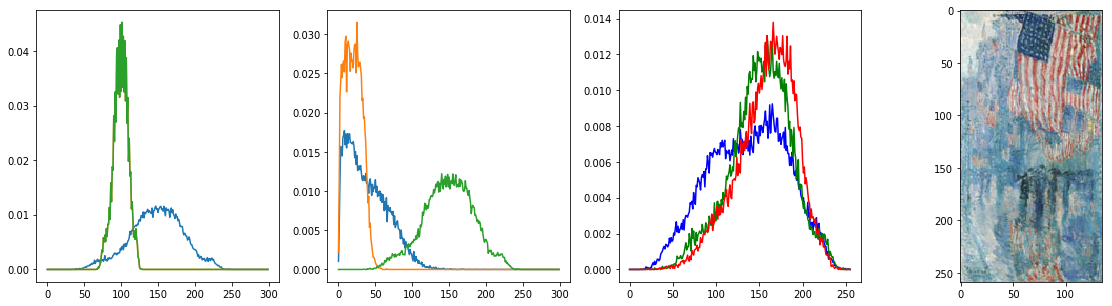

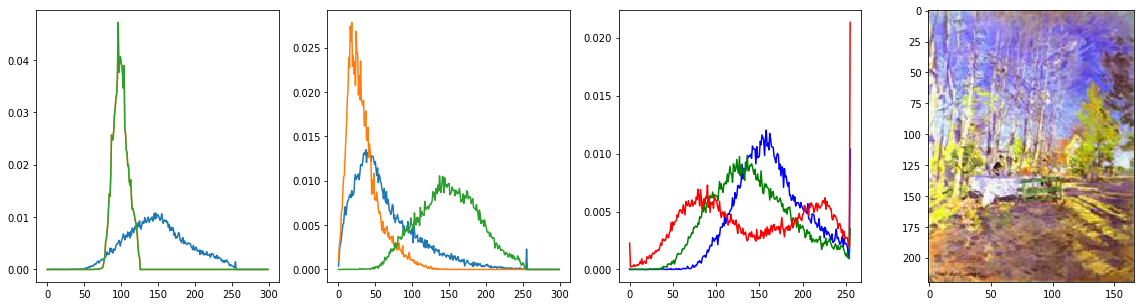

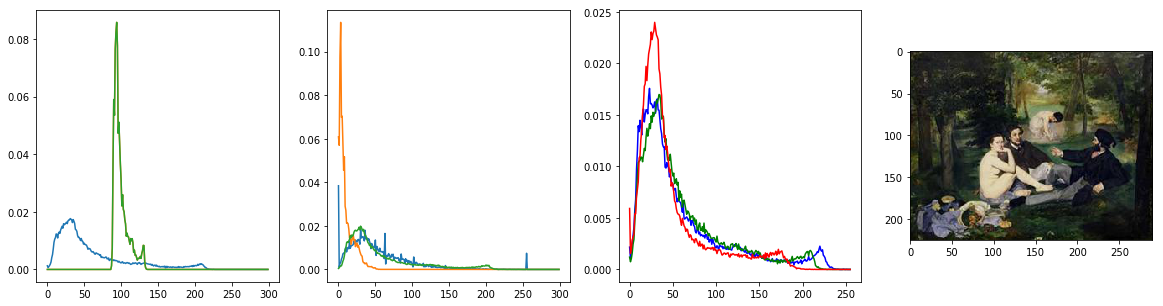

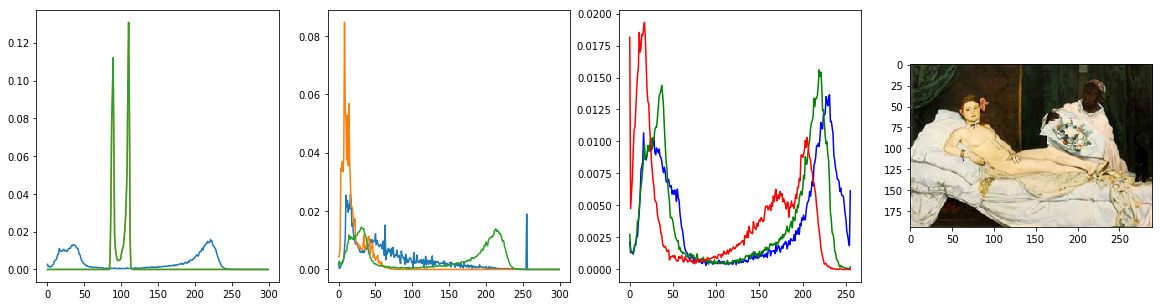

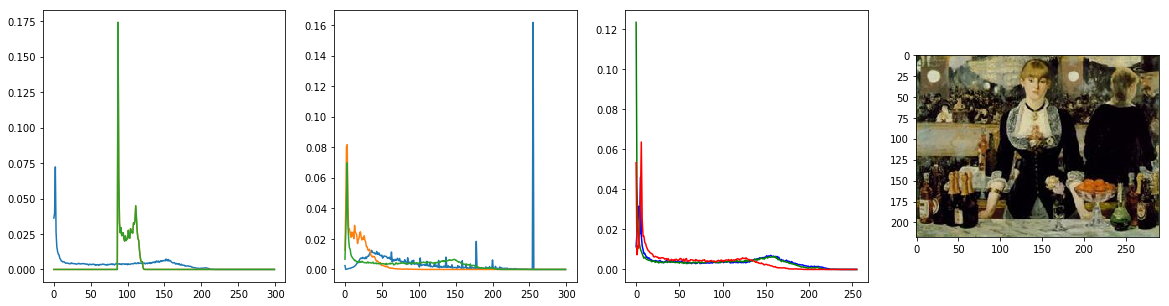

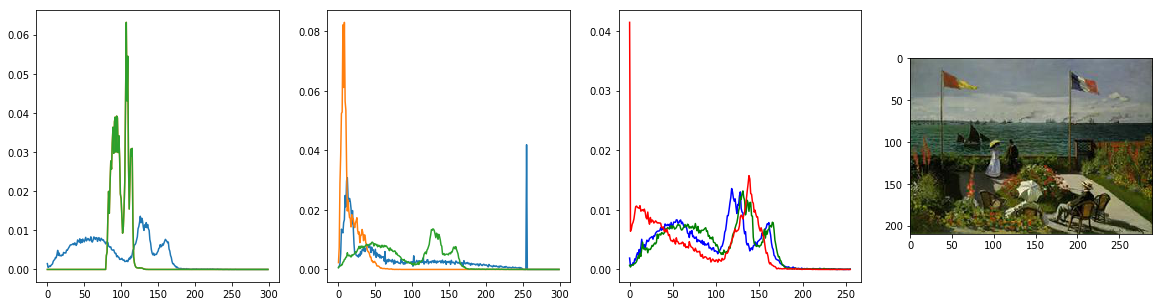

KeyboardInterrupt: 

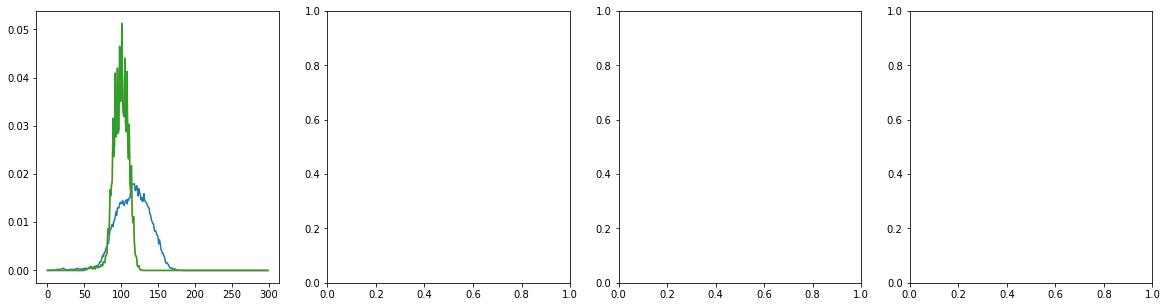

In [268]:
for i in range(1,31):
    path= '/CP/Git_time/TimeSeries_mid/imp/im'+str(i//10)+str(i%10)+'.jpg'
    quick_test(path)

# Contemporary Era Painting

# Pop Art

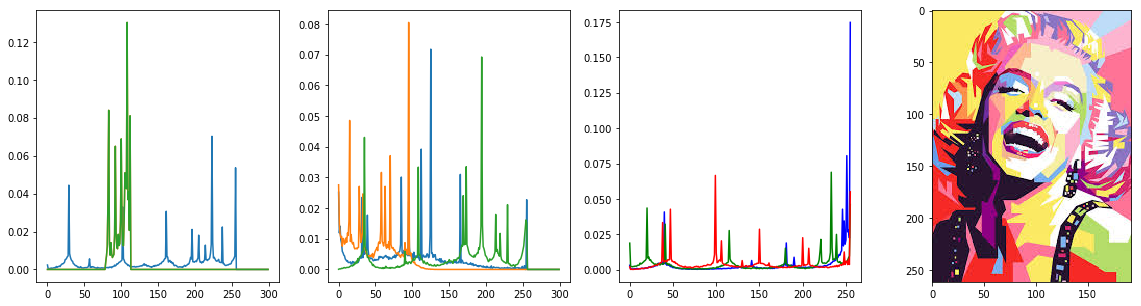

In [270]:
path= '/CP/Git_time/TimeSeries_mid/pop/p02.jpg' 
quick_test(path)

d:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


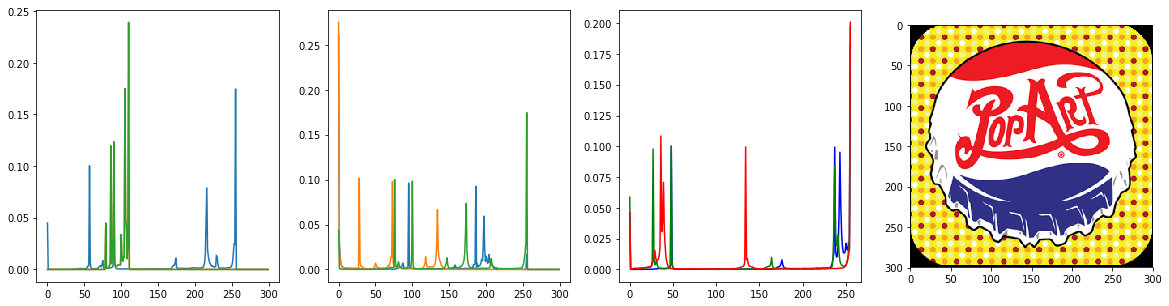

In [271]:
path= '/CP/Git_time/TimeSeries_mid/pop/p03.png' 
quick_test(path)

d:\anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


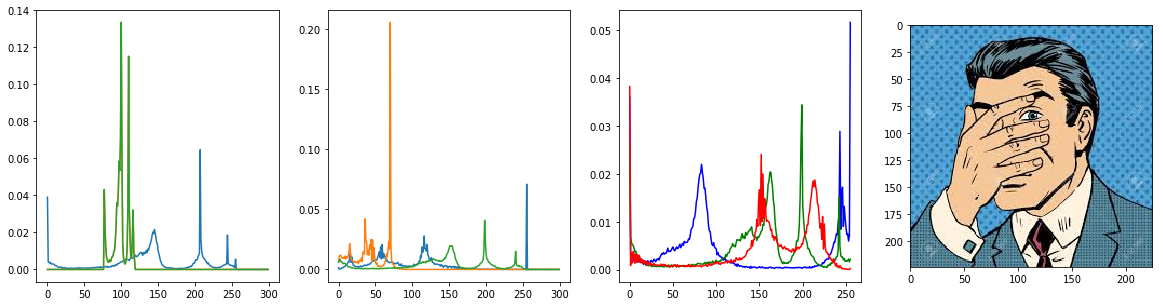

In [272]:
path= '/CP/Git_time/TimeSeries_mid/pop/p05.jpg' 
quick_test(path)

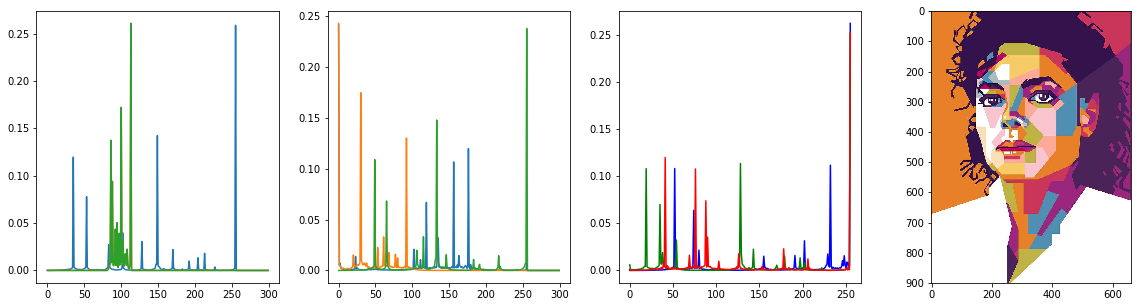

In [273]:
path= '/CP/Git_time/TimeSeries_mid/pop/p07.jpg' 
quick_test(path)